<a class="anchor" id="backtoc"></a>

## Table of Contents:
* [Imports](#imports)


* [Ano20132014](#20132014)
* [Positive/Negatives 20132014](#posneg20132014)
* [Positive Outcome 20132014](#positiveoutcome20132014)
* [Negative Outcome 20132014](#negativeoutcome20132014)
* [Oddballs 20132014](#oddballs20132014)


* [Ano20142015](#20142015)
* [Positive/Negatives 20142015](#posneg20142015)
* [Positive Outcome 20142015](#positiveoutcome20142015)
* [Negative Outcome 20142015](#negativeoutcome20142015)
* [Oddballs 20142015](#oddballs20142015)


* [Ano20152016](#20152016)
* [Positive/Negatives 20152016](#posneg20152016)
* [Positive Outcome 20152016](#positiveoutcome20152016)
* [Negative Outcome 20152016](#negativeoutcome20152016)
* [Oddballs 20152016](#oddballs20152016)


* [Ano20162017](#20162017)
* [Positive/Negatives 20162017](#posneg20162017)
* [Positive Outcome 20162017](#positiveoutcome20162017)
* [Negative Outcome 20162017](#negativeoutcome20162017)
* [Oddballs 20162017](#oddballs20162017)


* [Ano20172018](#20172018)
* [Positive/Negatives 20172018](#posneg20172018)
* [Positive Outcome 20172018](#positiveoutcome20172018)
* [Negative Outcome 20172018](#negativeoutcome20172018)
* [Oddballs 20172018](#oddballs20172018)


* [All Years](#allyears)


<a class="anchor" id="imports"></a>

# Imports
* [Back to TOC](#backtoc)


In [1]:
import pandas as pd
import numpy as np

<a class="anchor" id="20132014"></a>

# Ano20132014
* [Back to TOC](#backtoc)


In [2]:
Ano20132014 = pd.read_csv('Data/ProcessedDataPerYear/Ano20132014.csv', sep=',')
Ano20132014.head(2)


Ano20132014['Está satisfeito com a ferramenta DreamShaper?'].unique()

array([4, 3, 5, 2, 1], dtype=int64)

In [3]:
Ano20132014['Quanto aprendeu com a DreamShaper?'].unique()

array(['2', '1', '5', '4', '3', 'Response'], dtype=object)

In [4]:
Ano20132014 = Ano20132014.drop(Ano20132014[Ano20132014['Quanto aprendeu com a DreamShaper?']=='Response'].index)



In [5]:
Ano20132014['Quanto aprendeu com a DreamShaper?'] = Ano20132014['Quanto aprendeu com a DreamShaper?'].astype(str).astype(int)

<a class="anchor" id="posneg20132014"></a>

## Positives/Negatives
* [Back to TOC](#backtoc)


In [6]:
#positives vs negatives

Ano20132014posneg = Ano20132014.copy()
del Ano20132014posneg['Está satisfeito com a ferramenta DreamShaper?']
del Ano20132014posneg['Quanto aprendeu com a DreamShaper?']


In [7]:
Ano20132014posnegSum=Ano20132014posneg.sum(axis = 0, skipna = True) 
Ano20132014posnegSum = pd.DataFrame(Ano20132014posnegSum)
Ano20132014posnegSum['year'] = 2014
Ano20132014posnegSum.reset_index(level=0, inplace=True)
Ano20132014posnegSum.columns=[['Question', 'Counts', 'Year']]
Ano20132014posnegSum['population'] = 1550

Ano20132014posnegSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20132014posnegSum.csv', index = False)
Ano20132014posnegSum = pd.read_csv('Data/PositivosNegativosStandardized/Ano20132014posnegSum.csv', sep=',')
Ano20132014posnegSum['Percentage'] = Ano20132014posnegSum['Counts']/Ano20132014posnegSum['population']
Ano20132014posnegSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20132014posnegSum.csv', index = False)


In [8]:
Ano20132014posnegSum[['P/N','Question']] = Ano20132014posnegSum.Question.str.split(":",expand=True) 
Ano20132014posnegSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20132014posnegSum.csv', index = False)


In [9]:
Ano20132014posnegSum

Question  Counts  Year  population  Percentage        P/N
0            Aspecto Visual     906  2014        1550    0.584516  Positivos
1   Navegação na Ferramenta     890  2014        1550    0.574194  Positivos
2                 Perguntas     516  2014        1550    0.332903  Positivos
3                  Exemplos     668  2014        1550    0.430968  Positivos
4                    Vídeos     252  2014        1550    0.162581  Positivos
5        Modelo de Negócios     593  2014        1550    0.382581  Positivos
6   Indicações de Interface     191  2014        1550    0.123226  Positivos
7           Mural de Equipa      68  2014        1550    0.043871  Positivos
8          Gestão de Equipa      55  2014        1550    0.035484  Positivos
9       Gestão de Projectos     435  2014        1550    0.280645  Positivos
10           Aspecto Visual     151  2014        1550    0.097419  Negativos
11  Navegação na Ferramenta     276  2014        1550    0.178065  Negativos
12                Perguntas     246  2014        1550    0.158710  Negativos
13                 Exemplos     315  2014        1550    0.203226  Negativos
14                   Vídeos     643  2014        1550    0.414839  Negativos
15       Modelo de Negócios     138  2014        1550    0.089032  Negativos
16  Indicações de Interface     481  2014        1550    0.310323  Negativos
17          Mural de Equipa     575  2014        1550    0.370968  Negativos
18         Gestão de Equipa     498  2014        1550    0.321290  Negativos
19      Gestão de Projectos     207  2014        1550    0.133548  Negativos

In [10]:
import plotly_express as px

fig = px.bar(Ano20132014posnegSum, x="Question", y="Percentage", color='P/N', barmode='group',
            animation_frame='Year', hover_name='Question', range_y=[0,1])
fig.update_layout(title_text='Positive/Negative Features  - 2013/2014')

fig.show()
fig.write_image('ImageOutputs/figurePosNeg20132014.png')



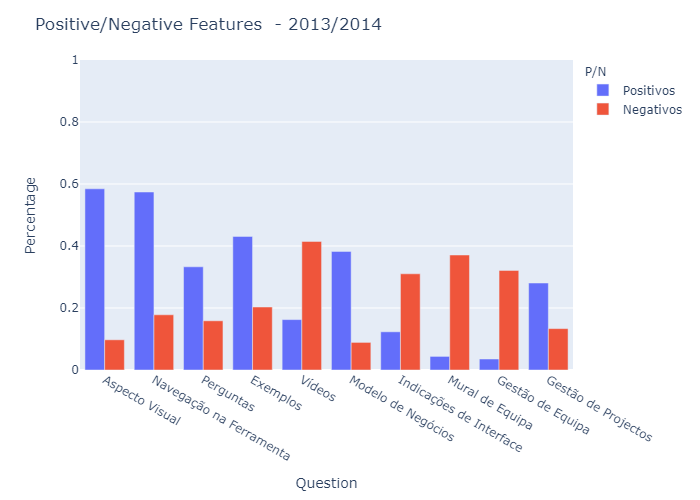

In [11]:
from IPython.display import Image
Image(filename='ImageOutputs/figurePosNeg20132014.png')



<a class="anchor" id="positiveoutcome20132014"></a>

## Positive Outcome
* [Back to TOC](#backtoc)


In [12]:
Ano20132014PO = Ano20132014.copy()
Ano20132014PO = Ano20132014PO[Ano20132014PO['Está satisfeito com a ferramenta DreamShaper?'] == 5] 
Ano20132014PO
Ano20132014PO.shape

(442, 22)

In [13]:
#subset for positive outcome and negative learning

del Ano20132014PO['Está satisfeito com a ferramenta DreamShaper?']
del Ano20132014PO['Quanto aprendeu com a DreamShaper?']

Ano20132014POSum=Ano20132014PO.sum(axis = 0, skipna = True) 
Ano20132014POSum = pd.DataFrame(Ano20132014POSum)
Ano20132014POSum['Year'] = 2014
Ano20132014POSum.reset_index(level=0, inplace=True)
Ano20132014POSum.columns=[['Question', 'Counts', 'Year']]
Ano20132014POSum['population'] = 442

Ano20132014POSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20132014POSum.csv', index = False)
Ano20132014POSum = pd.read_csv('Data/PositivosNegativosStandardized/Ano20132014POSum.csv', sep=',')
Ano20132014POSum['Percentage'] = Ano20132014POSum['Counts']/Ano20132014POSum['population']
Ano20132014POSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20132014POSum.csv', index = False)



In [14]:
Ano20132014POSum[['P/N','Question']] = Ano20132014POSum.Question.str.split(":",expand=True) 
Ano20132014POSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20132014POSum.csv', index = False)


In [15]:
import plotly_express as px

fig = px.bar(Ano20132014POSum, x="Question", y="Percentage", color='P/N', barmode='group',
            animation_frame='Year', hover_name='Question', range_y=[0,1])
fig.update_layout(title_text='Positive/Negative Features - Positive Outcome  - 2013/2014')

fig.show()
fig.write_image('ImageOutputs/figurePosNegLike20132014.png')


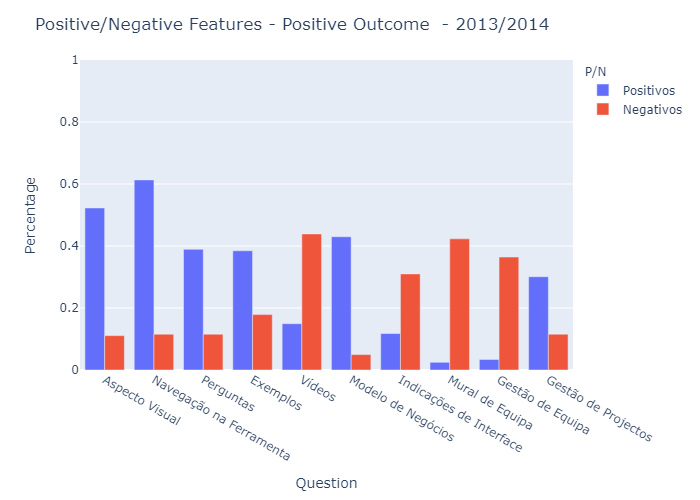

In [16]:
from IPython.display import Image
Image(filename='ImageOutputs/figurePosNegLike20132014.png')



<a class="anchor" id="negativeoutcome20132014"></a>

## Negative Outcome
* [Back to TOC](#backtoc)


In [17]:
Ano20132014NO = Ano20132014.copy()
#subset for positive outcome and negative learning
Ano20132014NO = Ano20132014NO[Ano20132014NO['Está satisfeito com a ferramenta DreamShaper?'] == 1] 
Ano20132014NO.shape

(116, 22)

In [18]:
del Ano20132014NO['Está satisfeito com a ferramenta DreamShaper?']
del Ano20132014NO['Quanto aprendeu com a DreamShaper?']

Ano20132014NOSum=Ano20132014NO.sum(axis = 0, skipna = True) 
Ano20132014NOSum = pd.DataFrame(Ano20132014NOSum)
Ano20132014NOSum['Year'] = 2014
Ano20132014NOSum.reset_index(level=0, inplace=True)
Ano20132014NOSum.columns=[['Question', 'Counts', 'Year']]
Ano20132014NOSum['population'] = 117

Ano20132014NOSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20132014NOSum.csv', index = False)
Ano20132014NOSum = pd.read_csv('Data/PositivosNegativosStandardized/Ano20132014NOSum.csv', sep=',')
Ano20132014NOSum['Percentage'] = Ano20132014NOSum['Counts']/Ano20132014NOSum['population']
Ano20132014NOSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20132014NOSum.csv', index = False)



In [19]:
Ano20132014NOSum[['P/N','Question']] = Ano20132014NOSum.Question.str.split(":",expand=True) 
Ano20132014NOSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20132014NOSum.csv', index = False)


In [20]:
import plotly_express as px

fig = px.bar(Ano20132014NOSum, x="Question", y="Percentage", color='P/N', barmode='group',
            animation_frame='Year', hover_name='Question', range_y=[0,1])
fig.update_layout(title_text='Positive/Negative Features - Negative Outcome  - 2013/2014')

fig.show()
fig.write_image('ImageOutputs/figurePosNegDislike20132014.png')



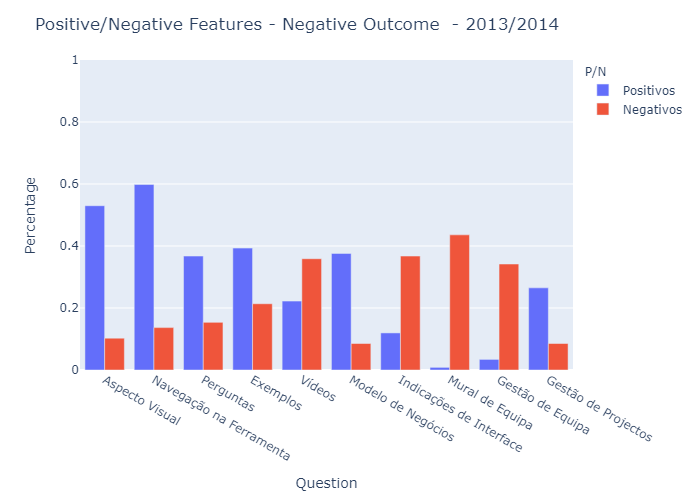

In [21]:
from IPython.display import Image
Image(filename='ImageOutputs/figurePosNegDislike20132014.png')



<a class="anchor" id="oddballs20132014"></a>

 ## Oddballs
 * [Back to TOC](#backtoc)


### Liked but no learning

In [22]:
Ano20132014likednolearn = Ano20132014.copy()
#subset for positive outcome and negative learning
Ano20132014likednolearn = Ano20132014likednolearn[Ano20132014likednolearn['Está satisfeito com a ferramenta DreamShaper?'] == 5] 
Ano20132014likednolearn = Ano20132014likednolearn[Ano20132014likednolearn['Quanto aprendeu com a DreamShaper?'] == 1] 
Ano20132014likednolearn.shape

(2, 22)

In [23]:
Ano20132014likednolearn

Está satisfeito com a ferramenta DreamShaper?  Positivos:Aspecto Visual  \
57                                                5                         1   
1315                                              5                         0   

      Positivos:Navegação na Ferramenta  Positivos:Perguntas  \
57                                    1                    0   
1315                                  0                    0   

      Positivos:Exemplos  Positivos:Vídeos  Positivos:Modelo de Negócios  \
57                     0                 0                             0   
1315                   0                 0                             1   

      Positivos:Indicações de Interface  Positivos:Mural de Equipa  \
57                                    0                          0   
1315                                  0                          0   

      Positivos:Gestão de Equipa  ...  Negativos:Navegação na Ferramenta  \
57                             0  ...                                  1   
1315                           1  ...                                  0   

      Negativos:Perguntas  Negativos:Exemplos  Negativos:Vídeos  \
57                      0                   0                 0   
1315                    1                   0                 0   

      Negativos:Modelo de Negócios  Negativos:Indicações de Interface  \
57                               0                                  0   
1315                             1                                  1   

      Negativos:Mural de Equipa  Negativos:Gestão de Equipa  \
57                            0                           1   
1315                          0                           0   

      Negativos:Gestão de Projectos  Quanto aprendeu com a DreamShaper?  
57                                0                                   1  
1315                              0                                   1  

[2 rows x 22 columns]

In [24]:
del Ano20132014likednolearn['Está satisfeito com a ferramenta DreamShaper?']
del Ano20132014likednolearn['Quanto aprendeu com a DreamShaper?']

Ano20132014likednolearnSum=Ano20132014likednolearn.sum(axis = 0, skipna = True) 
Ano20132014likednolearnSum = pd.DataFrame(Ano20132014likednolearnSum)
Ano20132014likednolearnSum['Year'] = 2014
Ano20132014likednolearnSum.reset_index(level=0, inplace=True)
Ano20132014likednolearnSum.columns=[['Question', 'Counts', 'Year']]
Ano20132014likednolearnSum['population'] = 2

Ano20132014likednolearnSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20132014likednolearnSum.csv', index = False)
Ano20132014likednolearnSum = pd.read_csv('Data/PositivosNegativosStandardized/Ano20132014likednolearnSum.csv', sep=',')
Ano20132014likednolearnSum['Percentage'] = Ano20132014likednolearnSum['Counts']/Ano20132014likednolearnSum['population']
Ano20132014likednolearnSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20132014likednolearnSum.csv', index = False)



In [25]:
Ano20132014likednolearnSum[['P/N','Question']] = Ano20132014likednolearnSum.Question.str.split(":",expand=True) 
Ano20132014likednolearnSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20132014likednolearnSum.csv', index = False)


In [26]:
import plotly_express as px

fig = px.bar(Ano20132014likednolearnSum, x="Question", y="Percentage", color='P/N', barmode='group',
            animation_frame='Year', hover_name='Question', range_y=[0,1])
fig.update_layout(title_text='Positive/Negative Features - Liked but No Learning  - 2013/2014')

fig.show()
fig.write_image('ImageOutputs/Ano20132014likednolearnSum.png')



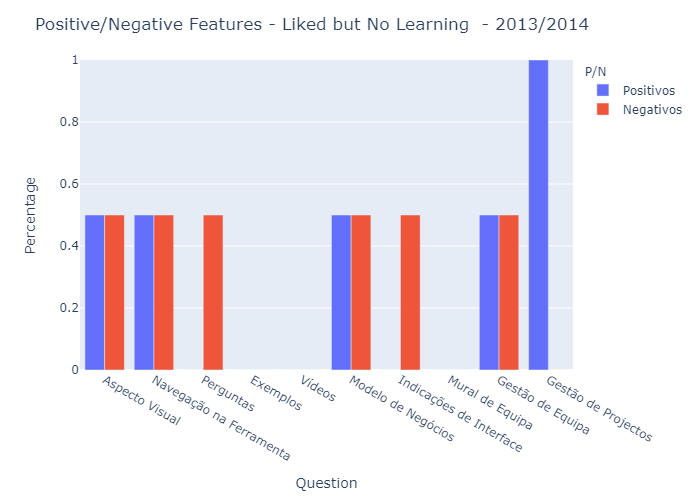

In [27]:
from IPython.display import Image
Image(filename='ImageOutputs/Ano20132014likednolearnSum.png')



### DisLiked but learned

In [28]:
Ano20132014dislikedlearn = Ano20132014.copy()
#subset for positive outcome and negative learning
Ano20132014dislikedlearn = Ano20132014dislikedlearn[Ano20132014dislikedlearn['Está satisfeito com a ferramenta DreamShaper?'] == 1] 
Ano20132014dislikedlearn = Ano20132014dislikedlearn[Ano20132014dislikedlearn['Quanto aprendeu com a DreamShaper?'] == 5] 
Ano20132014dislikedlearn.shape

(17, 22)

In [29]:
del Ano20132014dislikedlearn['Está satisfeito com a ferramenta DreamShaper?']
del Ano20132014dislikedlearn['Quanto aprendeu com a DreamShaper?']

Ano20132014dislikedlearnSum=Ano20132014dislikedlearn.sum(axis = 0, skipna = True) 
Ano20132014dislikedlearnSum = pd.DataFrame(Ano20132014dislikedlearnSum)
Ano20132014dislikedlearnSum['Year'] = 2014
Ano20132014dislikedlearnSum.reset_index(level=0, inplace=True)
Ano20132014dislikedlearnSum.columns=[['Question', 'Counts', 'Year']]
Ano20132014dislikedlearnSum['population'] = 17

Ano20132014dislikedlearnSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20132014dislikedlearnSum.csv', index = False)
Ano20132014dislikedlearnSum = pd.read_csv('Data/PositivosNegativosStandardized/Ano20132014dislikedlearnSum.csv', sep=',')
Ano20132014dislikedlearnSum['Percentage'] = Ano20132014dislikedlearnSum['Counts']/Ano20132014dislikedlearnSum['population']
Ano20132014dislikedlearnSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20132014dislikedlearnSum.csv', index = False)



In [30]:
Ano20132014dislikedlearnSum[['P/N','Question']] = Ano20132014dislikedlearnSum.Question.str.split(":",expand=True) 
Ano20132014dislikedlearnSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20132014dislikedlearnSum.csv', index = False)


In [31]:
import plotly_express as px

fig = px.bar(Ano20132014dislikedlearnSum, x="Question", y="Percentage", color='P/N', barmode='group',
            animation_frame='Year', hover_name='Question', range_y=[0,1])
fig.update_layout(title_text='Positive/Negative Features - Disliked but Learned - 2013/2014')

fig.show()
fig.write_image('ImageOutputs/Ano20132014dislikedlearnSum.png')



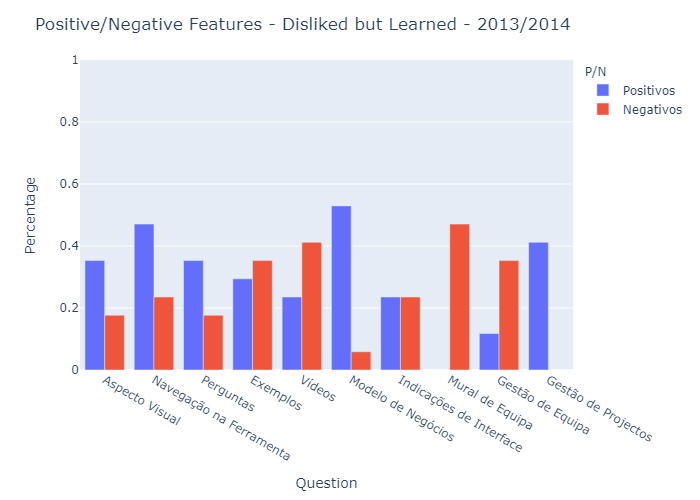

In [32]:
from IPython.display import Image
Image(filename='ImageOutputs/Ano20132014dislikedlearnSum.png')



<a class="anchor" id="20142015"></a>

# Ano20142015
* [Back to TOC](#backtoc)


In [33]:
Ano20142015 = pd.read_csv('Data/ProcessedDataPerYear/Ano20142015.csv', sep=',')


In [34]:
Ano20142015['Está satisfeito com a ferramenta DreamShaper?'].unique()

array([4, 5, 1, 3, 2], dtype=int64)

In [35]:
Ano20142015['Quanto aprendeu com a DreamShaper?'].unique()

array([3, 4, 5, 2, 1], dtype=int64)

<a class="anchor" id="posneg20142015"></a>

## Positives/Negatives
* [Back to TOC](#backtoc)


In [36]:
#positives vs negatives

Ano20142015posneg = Ano20142015.copy()
del Ano20142015posneg['Está satisfeito com a ferramenta DreamShaper?']
del Ano20142015posneg['Quanto aprendeu com a DreamShaper?']


In [37]:
Ano20142015posneg

Positivos:Aspecto Visual  Positivos:Navegação na Ferramenta  \
0                          0                                  0   
1                          0                                  0   
2                          0                                  1   
3                          0                                  1   
4                          0                                  0   
..                       ...                                ...   
83                         0                                  0   
84                         0                                  0   
85                         1                                  1   
86                         1                                  0   
87                         0                                  1   

    Positivos:Perguntas  Positivos:Exemplos  Positivos:Vídeos  \
0                     0                   0                 1   
1                     1                   1                 0   
2                     1                   0                 0   
3                     0                   0                 0   
4                     1                   1                 0   
..                  ...                 ...               ...   
83                    0                   0                 1   
84                    0                   0                 1   
85                    0                   0                 0   
86                    0                   1                 1   
87                    0                   1                 0   

    Positivos:Modelo de Negócios  Positivos:Indicações de Interface  \
0                              1                                  0   
1                              1                                  0   
2                              1                                  0   
3                              1                                  0   
4                              1                                  0   
..                           ...                                ...   
83                             1                                  0   
84                             1                                  0   
85                             0                                  1   
86                             0                                  0   
87                             1                                  0   

    Positivos:Mural de Equipa  Positivos:Gestão de Equipa  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
..                        ...                         ...   
83                          0                           0   
84                          0                           0   
85                          0                           0   
86                          0                           0   
87                          0                           0   

    Positivos:Gestão de Projectos  Negativos:Aspecto Visual  \
0                               1                         0   
1                               0                         0   
2                               0                         1   
3                               1                         1   
4                               0                         0   
..                            ...                       ...   
83                              1                         1   
84                              1                         0   
85                              0                         0   
86                              0                         0   
87                              0                         0   

    Negativos:Navegação na Ferramenta  Negativos:Perguntas  \
0            

In [38]:
Ano20142015posnegSum=Ano20142015posneg.sum(axis = 0, skipna = True) 
Ano20142015posnegSum = pd.DataFrame(Ano20142015posnegSum)
Ano20142015posnegSum['Year'] = 2015
Ano20142015posnegSum.reset_index(level=0, inplace=True)
Ano20142015posnegSum.columns=[['Question', 'Counts', 'Year']]
Ano20142015posnegSum['population'] = 88

Ano20142015posnegSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20142015posnegSum.csv', index = False)
Ano20142015posnegSum = pd.read_csv('Data/PositivosNegativosStandardized/Ano20142015posnegSum.csv', sep=',')
Ano20142015posnegSum['Percentage'] = Ano20142015posnegSum['Counts']/Ano20142015posnegSum['population']
Ano20142015posnegSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20142015posnegSum.csv', index = False)


In [39]:
Ano20142015posnegSum[['P/N','Question']] = Ano20142015posnegSum.Question.str.split(":",expand=True) 
Ano20142015posnegSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20142015posnegSum.csv', index = False)


In [40]:
import plotly_express as px

fig = px.bar(Ano20142015posnegSum, x="Question", y="Percentage", color='P/N', barmode='group',
            animation_frame='Year', hover_name='Question', range_y=[0,1])
fig.update_layout(title_text='Positive/Negative Features  - 2014/2015')

fig.show()
fig.write_image('ImageOutputs/figurePosNeg20142015.png')


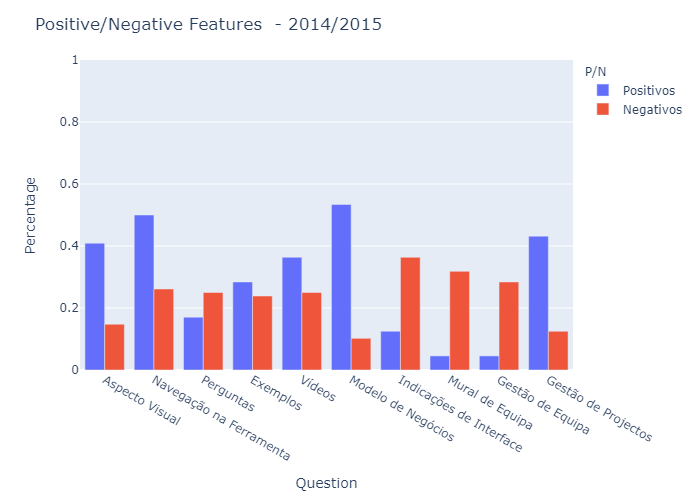

In [41]:
from IPython.display import Image
Image(filename='ImageOutputs/figurePosNeg20142015.png')



<a class="anchor" id="positiveoutcome20142015"></a>

## Positive Outcome
* [Back to TOC](#backtoc)


In [42]:
Ano20142015PO = Ano20142015.copy()
Ano20142015PO = Ano20142015PO[Ano20142015PO['Está satisfeito com a ferramenta DreamShaper?'] == 5] 
Ano20142015PO
Ano20142015PO.shape

(39, 22)

In [43]:
#subset for positive outcome and negative learning

del Ano20142015PO['Está satisfeito com a ferramenta DreamShaper?']
del Ano20142015PO['Quanto aprendeu com a DreamShaper?']

Ano20142015POSum=Ano20142015PO.sum(axis = 0, skipna = True) 
Ano20142015POSum = pd.DataFrame(Ano20142015POSum)
Ano20142015POSum['Year'] = 2015
Ano20142015POSum.reset_index(level=0, inplace=True)
Ano20142015POSum.columns=[['Question', 'Counts', 'Year']]
Ano20142015POSum['population'] = 39

Ano20142015POSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20142015POSum.csv', index = False)
Ano20142015POSum = pd.read_csv('Data/PositivosNegativosStandardized/Ano20142015POSum.csv', sep=',')
Ano20142015POSum['Percentage'] = Ano20142015POSum['Counts']/Ano20142015POSum['population']
Ano20142015POSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20142015POSum.csv', index = False)



In [44]:
Ano20142015POSum[['P/N','Question']] = Ano20142015POSum.Question.str.split(":",expand=True) 
Ano20142015POSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20142015POSum.csv', index = False)


In [45]:
import plotly_express as px

fig = px.bar(Ano20142015POSum, x="Question", y="Percentage", color='P/N', barmode='group',
            animation_frame='Year', hover_name='Question', range_y=[0,1])
fig.update_layout(title_text='Positive/Negative Features - Positive Outcome  - 2014/2015')

fig.show()
fig.write_image('ImageOutputs/figurePosNegLiked20142015.png')


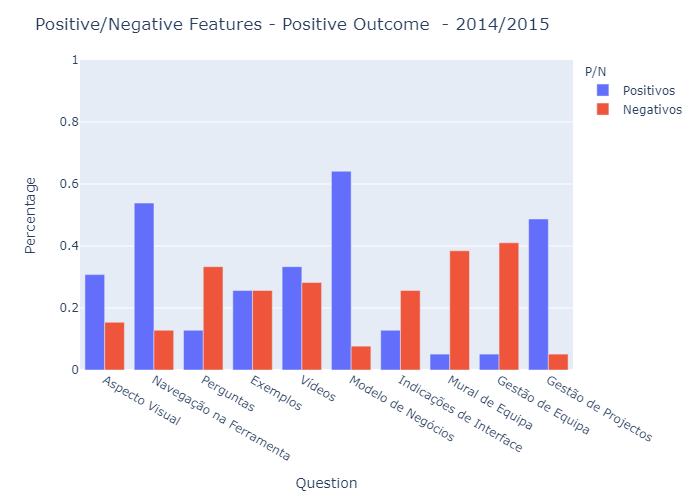

In [46]:
from IPython.display import Image
Image(filename='ImageOutputs/figurePosNegLiked20142015.png')



<a class="anchor" id="negativeoutcome20142015"></a>

## Negative Outcome
* [Back to TOC](#backtoc)


In [47]:
Ano20142015NO = Ano20142015.copy()
#subset for positive outcome and negative learning
Ano20142015NO = Ano20142015NO[Ano20142015NO['Está satisfeito com a ferramenta DreamShaper?'] == 1] 
del Ano20142015NO['Está satisfeito com a ferramenta DreamShaper?']
del Ano20142015NO['Quanto aprendeu com a DreamShaper?']
Ano20142015NO.shape

(8, 20)

In [48]:


Ano20142015NOSum=Ano20142015NO.sum(axis = 0, skipna = True) 
Ano20142015NOSum = pd.DataFrame(Ano20142015NOSum)
Ano20142015NOSum['Year'] = 2015
Ano20142015NOSum.reset_index(level=0, inplace=True)
Ano20142015NOSum.columns=[['Question', 'Counts', 'Year']]
Ano20142015NOSum['population'] = 22

Ano20142015NOSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20142015NOSum.csv', index = False)
Ano20142015NOSum = pd.read_csv('Data/PositivosNegativosStandardized/Ano20142015NOSum.csv', sep=',')
Ano20142015NOSum['Percentage'] = Ano20142015NOSum['Counts']/Ano20142015NOSum['population']
Ano20142015NOSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20142015NOSum.csv', index = False)



In [49]:
Ano20142015NOSum[['P/N','Question']] = Ano20142015NOSum.Question.str.split(":",expand=True) 


In [50]:
import plotly_express as px

fig = px.bar(Ano20142015NOSum, x="Question", y="Percentage", color='P/N', barmode='group',
            animation_frame='Year', hover_name='Question', range_y=[0,1])
fig.update_layout(title_text='Positive/Negative Features - Negative Outcome  - 2014/2015')

fig.show()
fig.write_image('ImageOutputs/figurePosNegDisLiked20142015.png')



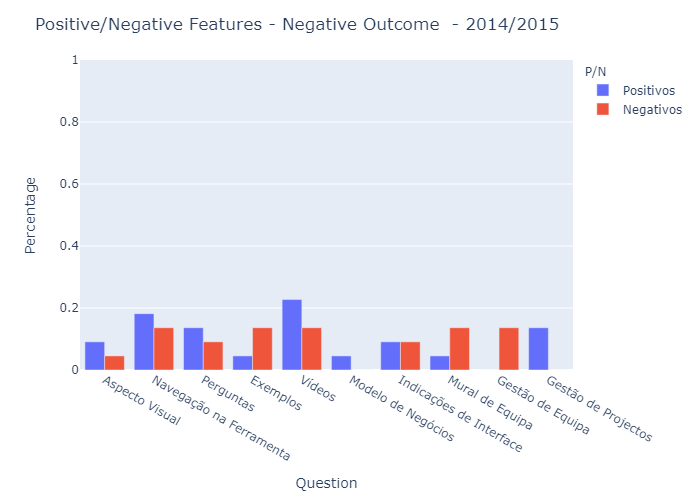

In [51]:
from IPython.display import Image
Image(filename='ImageOutputs/figurePosNegDisLiked20142015.png')



<a class="anchor" id="oddballs20142015"></a>

 ## Oddballs 
 * [Back to TOC](#backtoc)


### Liked but No Learning

In [52]:
Ano20142015likednolearn = Ano20142015.copy()
#subset for positive outcome and negative learning
Ano20142015likednolearn = Ano20142015likednolearn[Ano20142015likednolearn['Está satisfeito com a ferramenta DreamShaper?'] == 5] 
Ano20142015likednolearn = Ano20142015likednolearn[Ano20142015likednolearn['Quanto aprendeu com a DreamShaper?'] == 1] 
Ano20142015likednolearn.shape

(0, 22)

### Disliked but Learned

In [53]:
Ano20142015dislikedlearn = Ano20142015.copy()
#subset for positive outcome and negative learning
Ano20142015dislikedlearn = Ano20142015dislikedlearn[Ano20142015dislikedlearn['Está satisfeito com a ferramenta DreamShaper?'] == 1] 
Ano20142015dislikedlearn = Ano20142015dislikedlearn[Ano20142015dislikedlearn['Quanto aprendeu com a DreamShaper?'] == 5] 
Ano20142015dislikedlearn.shape

(4, 22)

In [54]:
del Ano20142015dislikedlearn['Está satisfeito com a ferramenta DreamShaper?']
del Ano20142015dislikedlearn['Quanto aprendeu com a DreamShaper?']

Ano20142015dislikedlearnSum=Ano20142015dislikedlearn.sum(axis = 0, skipna = True) 
Ano20142015dislikedlearnSum = pd.DataFrame(Ano20142015dislikedlearnSum)
Ano20142015dislikedlearnSum['Year'] = 2014
Ano20142015dislikedlearnSum.reset_index(level=0, inplace=True)
Ano20142015dislikedlearnSum.columns=[['Question', 'Counts', 'Year']]
Ano20142015dislikedlearnSum['population'] = 4

Ano20142015dislikedlearnSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20142015dislikedlearnSum.csv', index = False)
Ano20142015dislikedlearnSum = pd.read_csv('Data/PositivosNegativosStandardized/Ano20142015dislikedlearnSum.csv', sep=',')
Ano20142015dislikedlearnSum['Percentage'] = Ano20142015dislikedlearnSum['Counts']/Ano20142015dislikedlearnSum['population']
Ano20142015dislikedlearnSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20142015dislikedlearnSum.csv', index = False)



In [55]:
Ano20142015dislikedlearnSum[['P/N','Question']] = Ano20142015dislikedlearnSum.Question.str.split(":",expand=True) 
Ano20142015dislikedlearnSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20142015dislikedlearnSum.csv', index = False)


In [56]:
import plotly_express as px

fig = px.bar(Ano20142015dislikedlearnSum, x="Question", y="Percentage", color='P/N', barmode='group',
            animation_frame='Year', hover_name='Question', range_y=[0,1])
fig.update_layout(title_text='Positive/Negative Features - Disliked but Learned - 2014/2015')

fig.show()
fig.write_image('ImageOutputs/Ano20142015dislikedlearnSum.png')



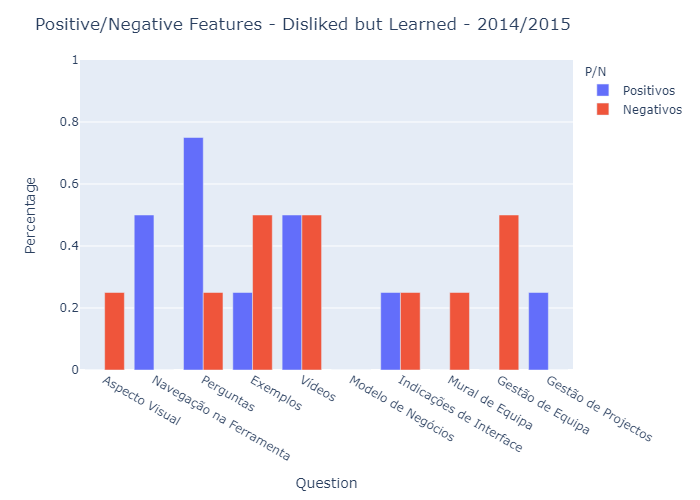

In [57]:
from IPython.display import Image
Image(filename='ImageOutputs/Ano20142015dislikedlearnSum.png')



<a class="anchor" id="20152016"></a>

# Ano20152016
* [Back to TOC](#backtoc)


In [58]:
Ano20152016 = pd.read_csv('Data/ProcessedDataPerYear/Ano20152016.csv', sep=',')
Ano20152016.shape

(280, 22)

In [59]:
Ano20152016['Está satisfeito com a ferramenta DreamShaper?'].unique()

array([3, 4, 0, 2, 1], dtype=int64)

In [60]:
Ano20152016['Quanto aprendeu com a DreamShaper?'].unique()

array([4, 3, 5, 0, 2, 1], dtype=int64)

In [61]:
Ano20152016 = Ano20152016.drop(Ano20152016[Ano20152016['Quanto aprendeu com a DreamShaper?']==0].index)
Ano20152016.shape

(249, 22)

<a class="anchor" id="posneg20152016"></a>

## Positives/Negatives
* [Back to TOC](#backtoc)


In [62]:
#positives vs negatives

Ano20152016posneg = Ano20152016.copy()
del Ano20152016posneg['Está satisfeito com a ferramenta DreamShaper?']
del Ano20152016posneg['Quanto aprendeu com a DreamShaper?']
Ano20152016posneg

Positivos:Aspecto Visual  Positivos:Navegação na Ferramenta  \
0                           1                                  0   
1                           1                                  1   
2                           0                                  0   
3                           1                                  1   
4                           0                                  0   
..                        ...                                ...   
272                         0                                  0   
273                         0                                  1   
276                         0                                  1   
278                         0                                  0   
279                         1                                  0   

     Positivos:Perguntas  Positivos:Exemplos  Positivos:Vídeos  \
0                      0                   0                 0   
1                      0                   0                 1   
2                      0                   1                 1   
3                      0                   0                 1   
4                      0                   0                 0   
..                   ...                 ...               ...   
272                    1                   0                 0   
273                    0                   0                 1   
276                    0                   0                 1   
278                    0                   1                 1   
279                    0                   0                 0   

     Positivos:Modelo de Negócios  Positivos:Indicações de Interface  \
0                               1                                  0   
1                               1                                  0   
2                               0                                  0   
3                               0                                  1   
4                               1                                  0   
..                            ...                                ...   
272                             1                                  0   
273                             1                                  0   
276                             0                                  0   
278                             0                                  0   
279                             1                                  0   

     Positivos:Mural de Equipa  Positivos:Gestão de Equipa  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
..                         ...                         ...   
272                          0                           0   
273                          0                           0   
276                          0                           0   
278                          0                           0   
279                          0                           1   

     Positivos:Gestão de Projectos  Negativos:Aspecto Visual  \
0                                1                         0   
1                                1                         0   
2                                0                         1   
3                                0                         0   
4                                0                         0   
..                             ...                       ...   
272                              0                         1   
273                              0                         0   
276                              0                         0   
278                              0                         0   
279                              0                         0   

     Negativos:N

In [63]:
Ano20152016posnegSum=Ano20152016posneg.sum(axis = 0, skipna = True) 
Ano20152016posnegSum = pd.DataFrame(Ano20152016posnegSum)
Ano20152016posnegSum['Year'] = 2016
Ano20152016posnegSum.reset_index(level=0, inplace=True)
Ano20152016posnegSum.columns=[['Question', 'Counts', 'Year']]
Ano20152016posnegSum['population'] = 249

Ano20152016posnegSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20152016posnegSum.csv', index = False)
Ano20152016posnegSum = pd.read_csv('Data/PositivosNegativosStandardized/Ano20152016posnegSum.csv', sep=',')
Ano20152016posnegSum['Percentage'] = Ano20142015posnegSum['Counts']/Ano20152016posnegSum['population']
Ano20152016posnegSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20152016posnegSum.csv', index = False)


In [64]:
Ano20152016posnegSum[['P/N','Question']] = Ano20152016posnegSum.Question.str.split(":",expand=True) 


In [65]:
import plotly_express as px

fig = px.bar(Ano20152016posnegSum, x="Question", y="Percentage", color='P/N', barmode='group',
            animation_frame='Year', hover_name='Question', range_y=[0,1])
fig.update_layout(title_text='Positive/Negative Features  - 2015/2016')

fig.show()
fig.write_image('ImageOutputs/figurePosNeg20152016.png')


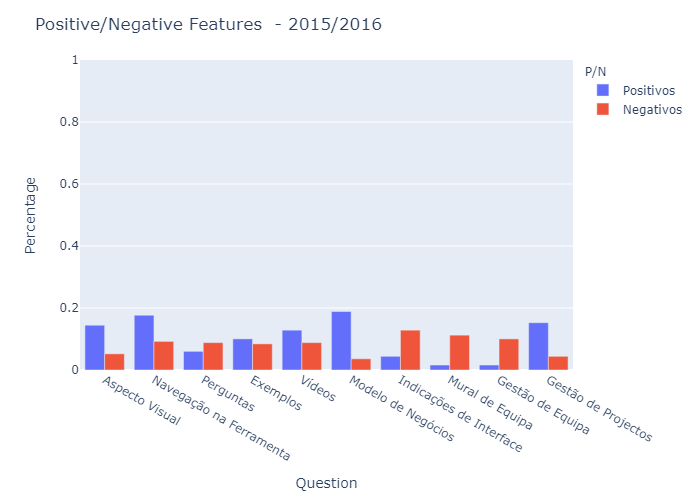

In [66]:
from IPython.display import Image
Image(filename='ImageOutputs/figurePosNeg20152016.png')



<a class="anchor" id="positiveoutcome20152016"></a>

## Positive Outcome
* [Back to TOC](#backtoc)


In [67]:
Ano20152016PO = Ano20152016.copy()
Ano20152016PO = Ano20152016PO[Ano20152016PO['Está satisfeito com a ferramenta DreamShaper?'] == 4] 
Ano20152016PO
Ano20152016PO.shape

(121, 22)

In [68]:
#subset for positive outcome and negative learning

del Ano20152016PO['Está satisfeito com a ferramenta DreamShaper?']
del Ano20152016PO['Quanto aprendeu com a DreamShaper?']

Ano20152016POSum=Ano20152016PO.sum(axis = 0, skipna = True) 
Ano20152016POSum = pd.DataFrame(Ano20152016POSum)
Ano20152016POSum['Year'] = 2016
Ano20152016POSum.reset_index(level=0, inplace=True)
Ano20152016POSum.columns=[['Question', 'Counts', 'Year']]
Ano20152016POSum['population'] = 121

Ano20152016POSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20152016POSum.csv', index = False)
Ano20152016POSum = pd.read_csv('Data/PositivosNegativosStandardized/Ano20152016POSum.csv', sep=',')
Ano20152016POSum['Percentage'] = Ano20152016POSum['Counts']/Ano20152016POSum['population']
Ano20152016POSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20152016POSum.csv', index = False)



Ano20152016POSum[['P/N','Question']] = Ano20152016POSum.Question.str.split(":",expand=True) 

import plotly_express as px

fig = px.bar(Ano20152016POSum, x="Question", y="Percentage", color='P/N', barmode='group',
            animation_frame='Year', hover_name='Question', range_y=[0,1])
fig.update_layout(title_text='Positive/Negative Features - Positive Outcome  - 2015/2016')

fig.show()
fig.write_image('ImageOutputs/figurePosNegLiked20152016.png')


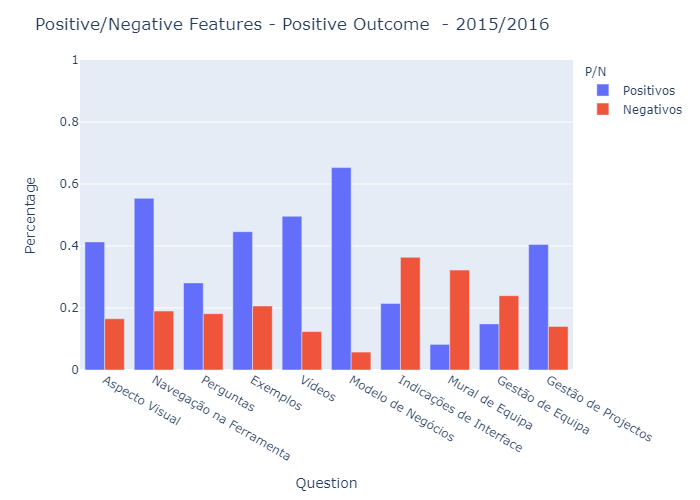

In [69]:
from IPython.display import Image
Image(filename='ImageOutputs/figurePosNegLiked20152016.png')



<a class="anchor" id="negativeoutcome20152016"></a>

## Negative Outcome
* [Back to TOC](#backtoc)


In [70]:
Ano20152016NO = Ano20152016.copy()
#subset for positive outcome and negative learning
Ano20152016NO = Ano20152016NO[Ano20152016NO['Está satisfeito com a ferramenta DreamShaper?'] == 1] 
del Ano20152016NO['Está satisfeito com a ferramenta DreamShaper?']
del Ano20152016NO['Quanto aprendeu com a DreamShaper?']
Ano20152016NO.shape

(10, 20)

In [71]:
Ano20152016NOSum=Ano20152016NO.sum(axis = 0, skipna = True) 
Ano20152016NOSum = pd.DataFrame(Ano20152016NOSum)
Ano20152016NOSum['Year'] = 2016
Ano20152016NOSum.reset_index(level=0, inplace=True)
Ano20152016NOSum.columns=[['Question', 'Counts', 'Year']]
Ano20152016NOSum['population'] = 10

Ano20152016NOSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20152016NOSum.csv', index = False)
Ano20152016NOSum = pd.read_csv('Data/PositivosNegativosStandardized/Ano20152016NOSum.csv', sep=',')
Ano20152016NOSum['Percentage'] = Ano20152016NOSum['Counts']/Ano20152016NOSum['population']
Ano20152016NOSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20152016NOSum.csv', index = False)

Ano20152016NOSum[['P/N','Question']] = Ano20152016NOSum.Question.str.split(":",expand=True) 


import plotly_express as px

fig = px.bar(Ano20152016NOSum, x="Question", y="Percentage", color='P/N', barmode='group',
            animation_frame='Year', hover_name='Question', range_y=[0,1])
fig.update_layout(title_text='Positive/Negative Features - Negative Outcome  - 2015/2016')

fig.show()
fig.write_image('ImageOutputs/figurePosNegDisLiked20152016.png')



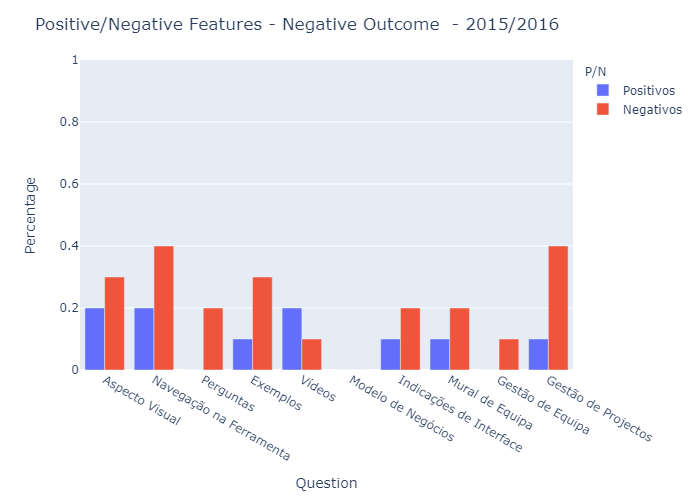

In [72]:
from IPython.display import Image
Image(filename='ImageOutputs/figurePosNegDisLiked20152016.png')



<a class="anchor" id="oddballs20152016"></a>

 ## Oddballs
 * [Back to TOC](#backtoc)


### Liked but No Learning

In [73]:
Ano20152016likednolearn = Ano20152016.copy()
#subset for positive outcome and negative learning
Ano20152016likednolearn = Ano20152016likednolearn[Ano20152016likednolearn['Está satisfeito com a ferramenta DreamShaper?'] == 4] 
Ano20152016likednolearn = Ano20152016likednolearn[Ano20152016likednolearn['Quanto aprendeu com a DreamShaper?'] == 1] 
Ano20152016likednolearn.shape

(0, 22)

### DisLiked but learned

In [74]:
Ano20152016dislikedlearn = Ano20152016.copy()
#subset for positive outcome and negative learning
Ano20152016dislikedlearn = Ano20152016dislikedlearn[Ano20152016dislikedlearn['Está satisfeito com a ferramenta DreamShaper?'] == 1] 
Ano20152016dislikedlearn = Ano20152016dislikedlearn[Ano20152016dislikedlearn['Quanto aprendeu com a DreamShaper?'] == 5] 
Ano20152016dislikedlearn.shape

(0, 22)

<a class="anchor" id="20162017"></a>

# Ano20162017
* [Back to TOC](#backtoc)


In [75]:
Ano20162017 = pd.read_csv('Data/ProcessedDataPerYear/Ano20162017.csv', sep=',')


In [76]:
Ano20162017['Está satisfeito com a ferramenta DreamShaper?'].unique()

array([4, 3, 1, 2], dtype=int64)

In [77]:
Ano20162017['Quanto aprendeu com a DreamShaper?'].unique()

array([5, 3, 4, 2, 1], dtype=int64)

<a class="anchor" id="posneg20162017"></a>

## Positives/Negatives
* [Back to TOC](#backtoc)


In [78]:
#positives vs negatives

Ano20162017posneg = Ano20162017.copy()
del Ano20162017posneg['Está satisfeito com a ferramenta DreamShaper?']
del Ano20162017posneg['Quanto aprendeu com a DreamShaper?']


In [79]:
Ano20162017posnegSum=Ano20162017posneg.sum(axis = 0, skipna = True) 
Ano20162017posnegSum = pd.DataFrame(Ano20162017posnegSum)
Ano20162017posnegSum['Year'] = 2017
Ano20162017posnegSum.reset_index(level=0, inplace=True)
Ano20162017posnegSum.columns=[['Question', 'Counts', 'Year']]
Ano20162017posnegSum['population'] = 442

Ano20162017posnegSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20162017posnegSum.csv', index = False)
Ano20162017posnegSum = pd.read_csv('Data/PositivosNegativosStandardized/Ano20162017posnegSum.csv', sep=',')
Ano20162017posnegSum['Percentage'] = Ano20162017posnegSum['Counts']/Ano20162017posnegSum['population']
Ano20162017posnegSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20162017posnegSum.csv', index = False)


In [80]:
Ano20162017posnegSum[['P/N','Question']] = Ano20162017posnegSum.Question.str.split(":",expand=True) 


In [81]:
import plotly_express as px

fig = px.bar(Ano20162017posnegSum, x="Question", y="Percentage", color='P/N', barmode='group',
            animation_frame='Year', hover_name='Question', range_y=[0,1])
fig.update_layout(title_text='Positive/Negative Features  - 2016/2017')

fig.show()
fig.write_image('ImageOutputs/figurePosNeg20162017.png')


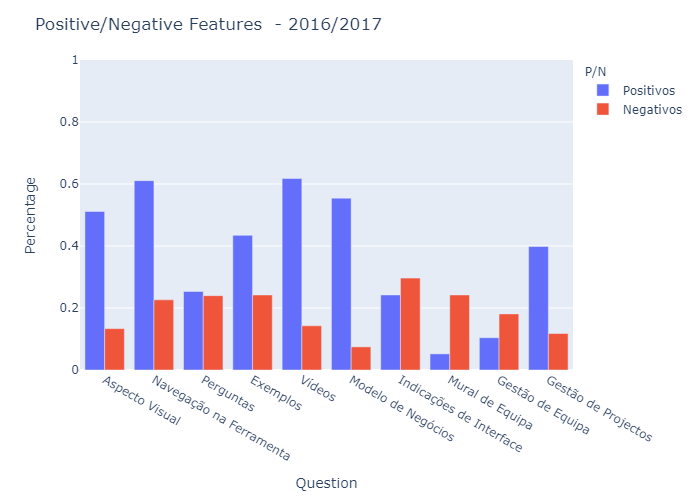

In [82]:
from IPython.display import Image
Image(filename='ImageOutputs/figurePosNeg20162017.png')



<a class="anchor" id="positiveoutcome20162017"></a>

## Positive Outcome
* [Back to TOC](#backtoc)


In [83]:
Ano20162017PO = Ano20162017.copy()
Ano20162017PO = Ano20162017PO[Ano20162017PO['Está satisfeito com a ferramenta DreamShaper?'] == 4] 
Ano20162017PO
Ano20162017PO.shape


(304, 22)

In [84]:

del Ano20162017PO['Está satisfeito com a ferramenta DreamShaper?']
del Ano20162017PO['Quanto aprendeu com a DreamShaper?']

Ano20162017POSum=Ano20162017PO.sum(axis = 0, skipna = True) 
Ano20162017POSum = pd.DataFrame(Ano20162017POSum)
Ano20162017POSum['Year'] = 2017
Ano20162017POSum.reset_index(level=0, inplace=True)
Ano20162017POSum.columns=[['Question', 'Counts', 'Year']]
Ano20162017POSum['population'] = 304

Ano20162017POSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20162017POSum.csv', index = False)
Ano20162017POSum = pd.read_csv('Data/PositivosNegativosStandardized/Ano20162017POSum.csv', sep=',')
Ano20162017POSum['Percentage'] = Ano20162017POSum['Counts']/Ano20162017POSum['population']
Ano20162017POSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20162017POSum.csv', index = False)



Ano20162017POSum[['P/N','Question']] = Ano20162017POSum.Question.str.split(":",expand=True) 

import plotly_express as px

fig = px.bar(Ano20162017POSum, x="Question", y="Percentage", color='P/N', barmode='group',
            animation_frame='Year', hover_name='Question', range_y=[0,1])
fig.update_layout(title_text='Positive/Negative Features - Positive Outcome  - 2016/2017')

fig.show()
fig.write_image('ImageOutputs/figurePosNegLiked20162017.png')

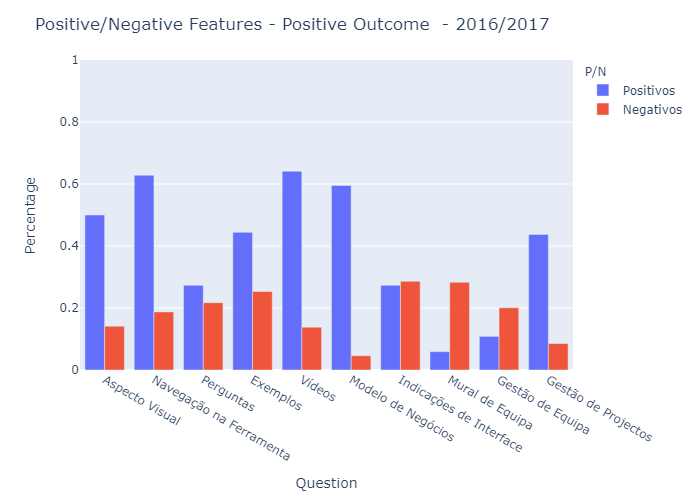

In [85]:
from IPython.display import Image
Image(filename='ImageOutputs/figurePosNegLiked20162017.png')



<a class="anchor" id="negativeoutcome20162017"></a>

## Negative Outcome
* [Back to TOC](#backtoc)


In [86]:
Ano20162017NO = Ano20162017.copy()
#subset for positive outcome and negative learning
Ano20162017NO = Ano20162017NO[Ano20162017NO['Está satisfeito com a ferramenta DreamShaper?'] == 1] 
del Ano20162017NO['Está satisfeito com a ferramenta DreamShaper?']
del Ano20162017NO['Quanto aprendeu com a DreamShaper?']
Ano20162017NO.shape


(3, 20)

In [87]:
Ano20162017NOSum=Ano20162017NO.sum(axis = 0, skipna = True) 
Ano20162017NOSum = pd.DataFrame(Ano20162017NOSum)
Ano20162017NOSum['Year'] = 2017
Ano20162017NOSum.reset_index(level=0, inplace=True)
Ano20162017NOSum.columns=[['Question', 'Counts', 'Year']]
Ano20162017NOSum['population'] = 3

Ano20162017NOSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20162017NOSum.csv', index = False)
Ano20162017NOSum = pd.read_csv('Data/PositivosNegativosStandardized/Ano20162017NOSum.csv', sep=',')
Ano20162017NOSum['Percentage'] = Ano20162017NOSum['Counts']/Ano20162017NOSum['population']
Ano20162017NOSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20162017NOSum.csv', index = False)

Ano20162017NOSum[['P/N','Question']] = Ano20162017NOSum.Question.str.split(":",expand=True) 


import plotly_express as px

fig = px.bar(Ano20162017NOSum, x="Question", y="Percentage", color='P/N', barmode='group',
            animation_frame='Year', hover_name='Question', range_y=[0,1])
fig.update_layout(title_text='Positive/Negative Features - Negative Outcome  - 2016/2017')

fig.show()
fig.write_image('ImageOutputs/figurePosNegDisLiked20162017.png')

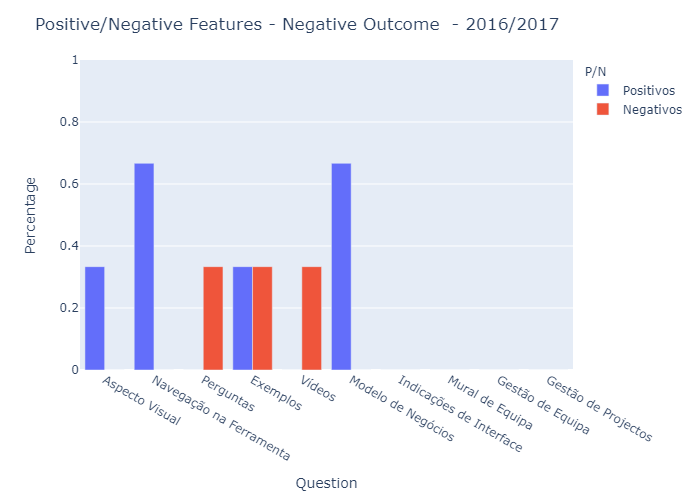

In [88]:
from IPython.display import Image
Image(filename='ImageOutputs/figurePosNegDisLiked20162017.png')



<a class="anchor" id="oddballs20162017"></a>

 ## Oddballs
 * [Back to TOC](#backtoc)


### Liked but No Learning

In [89]:
Ano20162017likednolearn = Ano20162017.copy()
#subset for positive outcome and negative learning
Ano20162017likednolearn = Ano20162017likednolearn[Ano20162017likednolearn['Está satisfeito com a ferramenta DreamShaper?'] == 4] 
Ano20162017likednolearn = Ano20162017likednolearn[Ano20162017likednolearn['Quanto aprendeu com a DreamShaper?'] == 1] 
Ano20162017likednolearn.shape

(1, 22)

In [90]:
del Ano20162017likednolearn['Está satisfeito com a ferramenta DreamShaper?']
del Ano20162017likednolearn['Quanto aprendeu com a DreamShaper?']

Ano20162017likednolearnSum=Ano20162017likednolearn.sum(axis = 0, skipna = True) 
Ano20162017likednolearnSum = pd.DataFrame(Ano20162017likednolearnSum)
Ano20162017likednolearnSum['Year'] = 2014
Ano20162017likednolearnSum.reset_index(level=0, inplace=True)
Ano20162017likednolearnSum.columns=[['Question', 'Counts', 'Year']]
Ano20162017likednolearnSum['population'] = 1

Ano20162017likednolearnSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20162017likednolearnSum.csv', index = False)
Ano20162017likednolearnSum = pd.read_csv('Data/PositivosNegativosStandardized/Ano20162017likednolearnSum.csv', sep=',')
Ano20162017likednolearnSum['Percentage'] = Ano20162017likednolearnSum['Counts']/Ano20162017likednolearnSum['population']
Ano20162017likednolearnSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20162017likednolearnSum.csv', index = False)



In [91]:
Ano20162017likednolearnSum[['P/N','Question']] = Ano20162017likednolearnSum.Question.str.split(":",expand=True) 
Ano20162017likednolearnSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20162017likednolearnSum.csv', index = False)


In [92]:
import plotly_express as px

fig = px.bar(Ano20162017likednolearnSum, x="Question", y="Percentage", color='P/N', barmode='group',
            animation_frame='Year', hover_name='Question', range_y=[0,1])
fig.update_layout(title_text='Positive/Negative Features - Liked but No Learning  - 2016/2017')

fig.show()
fig.write_image('ImageOutputs/Ano20162017likednolearnSum.png')



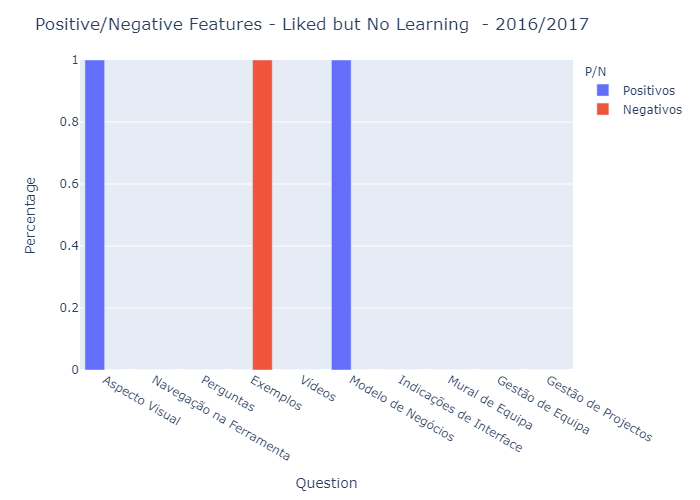

In [93]:
from IPython.display import Image
Image(filename='ImageOutputs/Ano20162017likednolearnSum.png')



### Disliked but Learned

In [94]:
Ano20162017dislikedlearn = Ano20162017.copy()
#subset for positive outcome and negative learning
Ano20162017dislikedlearn = Ano20162017dislikedlearn[Ano20162017dislikedlearn['Está satisfeito com a ferramenta DreamShaper?'] == 1] 
Ano20162017dislikedlearn = Ano20162017dislikedlearn[Ano20162017dislikedlearn['Quanto aprendeu com a DreamShaper?'] == 5] 
Ano20162017dislikedlearn.shape

(1, 22)

In [95]:
del Ano20162017dislikedlearn['Está satisfeito com a ferramenta DreamShaper?']
del Ano20162017dislikedlearn['Quanto aprendeu com a DreamShaper?']

Ano20162017dislikedlearnSum=Ano20162017dislikedlearn.sum(axis = 0, skipna = True) 
Ano20162017dislikedlearnSum = pd.DataFrame(Ano20162017dislikedlearnSum)
Ano20162017dislikedlearnSum['Year'] = 2014
Ano20162017dislikedlearnSum.reset_index(level=0, inplace=True)
Ano20162017dislikedlearnSum.columns=[['Question', 'Counts', 'Year']]
Ano20162017dislikedlearnSum['population'] = 1

Ano20162017dislikedlearnSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20162017dislikedlearnSum.csv', index = False)
Ano20162017dislikedlearnSum = pd.read_csv('Data/PositivosNegativosStandardized/Ano20162017dislikedlearnSum.csv', sep=',')
Ano20162017dislikedlearnSum['Percentage'] = Ano20162017dislikedlearnSum['Counts']/Ano20162017dislikedlearnSum['population']
Ano20162017dislikedlearnSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20162017dislikedlearnSum.csv', index = False)



In [96]:
Ano20162017dislikedlearnSum[['P/N','Question']] = Ano20162017dislikedlearnSum.Question.str.split(":",expand=True) 
Ano20162017dislikedlearnSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20162017dislikedlearnSum.csv', index = False)


In [97]:
import plotly_express as px

fig = px.bar(Ano20162017dislikedlearnSum, x="Question", y="Percentage", color='P/N', barmode='group',
            animation_frame='Year', hover_name='Question', range_y=[0,1])
fig.update_layout(title_text='Positive/Negative Features - Disliked but Learned - 2016/2017')

fig.show()
fig.write_image('ImageOutputs/Ano20162017dislikedlearnSum.png')



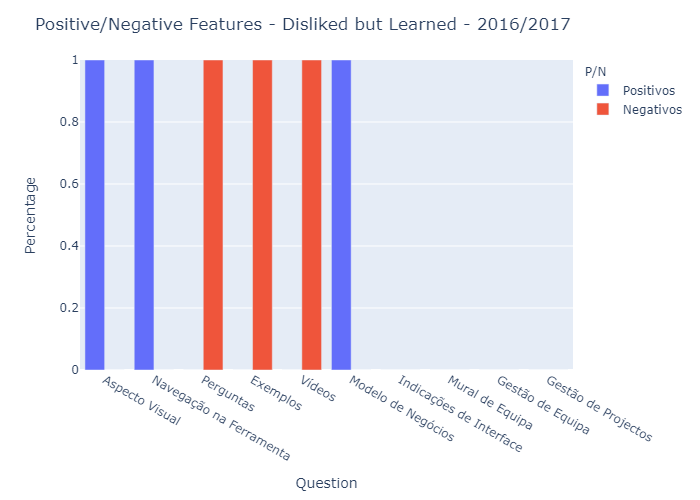

In [98]:
from IPython.display import Image
Image(filename='ImageOutputs/Ano20162017dislikedlearnSum.png')



<a class="anchor" id="20172018"></a>

# Ano20172018
* [Back to TOC](#backtoc)


In [99]:
Ano20172018 = pd.read_csv('Data/ProcessedDataPerYear/Ano20172018.csv', sep=',')
Ano20172018 = Ano20172018.dropna()


In [100]:
Ano20172018['Está satisfeito com a ferramenta DreamShaper?'].unique()

array([4., 3., 2., 1.])

In [101]:
Ano20172018['Quanto aprendeu com a DreamShaper?'].unique()

array([3., 4., 5., 2., 1.])

In [102]:
Ano20172018['Quanto aprendeu com a DreamShaper?']= Ano20172018['Quanto aprendeu com a DreamShaper?'].astype(int)


In [103]:
Ano20172018['Está satisfeito com a ferramenta DreamShaper?']= Ano20172018['Está satisfeito com a ferramenta DreamShaper?'].astype(int)


<a class="anchor" id="posneg20172018"></a>

## Positives/Negatives
* [Back to TOC](#backtoc)


In [104]:
#positives vs negatives

Ano20172018posneg = Ano20172018.copy()
del Ano20172018posneg['Está satisfeito com a ferramenta DreamShaper?']
del Ano20172018posneg['Quanto aprendeu com a DreamShaper?']


In [105]:
Ano20172018posnegSum=Ano20172018posneg.sum(axis = 0, skipna = True) 
Ano20172018posnegSum = pd.DataFrame(Ano20172018posnegSum)
Ano20172018posnegSum['Year'] = 2018
Ano20172018posnegSum.reset_index(level=0, inplace=True)
Ano20172018posnegSum.columns=[['Question', 'Counts', 'Year']]
Ano20172018posnegSum['population'] = 870

Ano20172018posnegSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20172018posnegSum.csv', index = False)
Ano20172018posnegSum = pd.read_csv('Data/PositivosNegativosStandardized/Ano20172018posnegSum.csv', sep=',')
Ano20172018posnegSum['Percentage'] = Ano20172018posnegSum['Counts']/Ano20172018posnegSum['population']
Ano20172018posnegSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20172018posnegSum.csv', index = False)


In [106]:
Ano20172018posnegSum[['P/N','Question']] = Ano20172018posnegSum.Question.str.split(":",expand=True) 


In [107]:
import plotly_express as px

fig = px.bar(Ano20172018posnegSum, x="Question", y="Percentage", color='P/N', barmode='group',
            animation_frame='Year', hover_name='Question', range_y=[0,1])
fig.update_layout(title_text='Positive/Negative Features  - 2017/2018')

fig.show()
fig.write_image('ImageOutputs/figurePosNeg20172018.png')

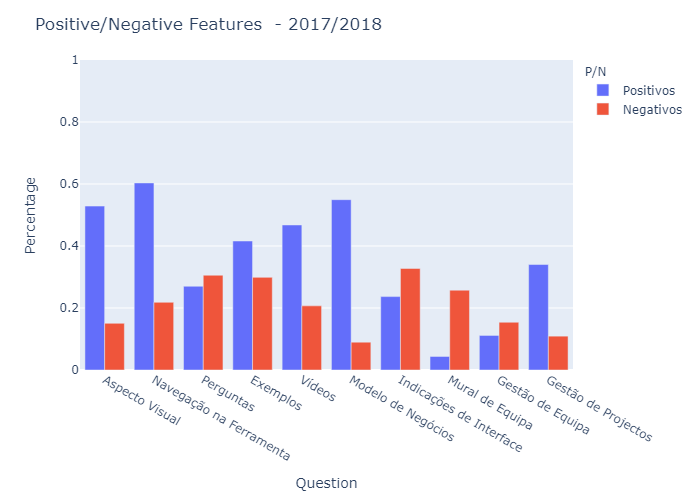

In [108]:
from IPython.display import Image
Image(filename='ImageOutputs/figurePosNeg20172018.png')



<a class="anchor" id="positiveoutcome20172018"></a>

<a class="anchor" id="positiveoutcome20172018"></a>

## Positive Outcome 
* [Back to TOC](#backtoc)


In [109]:
Ano20172018PO = Ano20172018.copy()
Ano20172018PO = Ano20172018PO[Ano20172018PO['Está satisfeito com a ferramenta DreamShaper?'] == 4] 
Ano20172018PO
Ano20172018PO.shape



(560, 22)

In [110]:

del Ano20172018PO['Está satisfeito com a ferramenta DreamShaper?']
del Ano20172018PO['Quanto aprendeu com a DreamShaper?']

Ano20172018POSum=Ano20172018PO.sum(axis = 0, skipna = True) 
Ano20172018POSum = pd.DataFrame(Ano20172018POSum)
Ano20172018POSum['Year'] = 2018
Ano20172018POSum.reset_index(level=0, inplace=True)
Ano20172018POSum.columns=[['Question', 'Counts', 'Year']]
Ano20172018POSum['population'] = 560

Ano20172018POSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20172018POSum.csv', index = False)
Ano20172018POSum = pd.read_csv('Data/PositivosNegativosStandardized/Ano20172018POSum.csv', sep=',')
Ano20172018POSum['Percentage'] = Ano20172018POSum['Counts']/Ano20172018POSum['population']
Ano20172018POSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20172018POSum.csv', index = False)



Ano20172018POSum[['P/N','Question']] = Ano20172018POSum.Question.str.split(":",expand=True) 

import plotly_express as px

fig = px.bar(Ano20172018POSum, x="Question", y="Percentage", color='P/N', barmode='group',
            animation_frame='Year', hover_name='Question', range_y=[0,1])
fig.update_layout(title_text='Positive/Negative Features - Positive Outcome  - 2017/2018')

fig.show()
fig.write_image('ImageOutputs/figurePosNegLiked20172018.png')



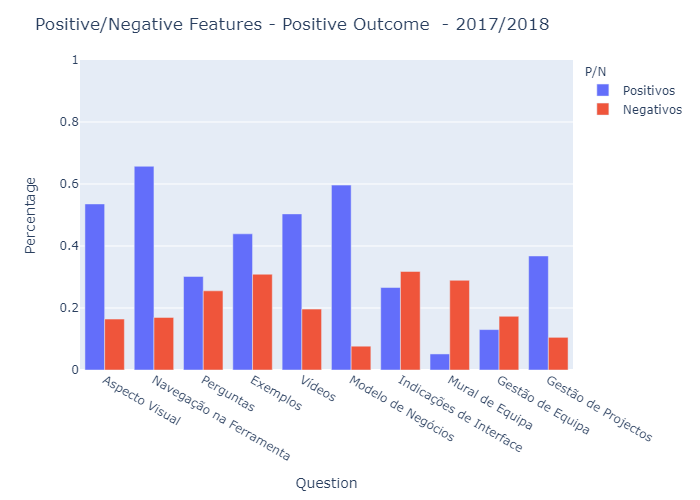

In [111]:
from IPython.display import Image
Image(filename='ImageOutputs/figurePosNegLiked20172018.png')



<a class="anchor" id="negativeoutcome20172018"></a>

## Negative Outcome 
* [Back to TOC](#backtoc)


In [112]:
Ano20172018NO = Ano20172018.copy()
#subset for positive outcome and negative learning
Ano20172018NO = Ano20172018NO[Ano20172018NO['Está satisfeito com a ferramenta DreamShaper?'] == 1] 
del Ano20172018NO['Está satisfeito com a ferramenta DreamShaper?']
del Ano20172018NO['Quanto aprendeu com a DreamShaper?']
Ano20172018NO.shape


(4, 20)

In [113]:
Ano20172018NOSum=Ano20172018NO.sum(axis = 0, skipna = True) 
Ano20172018NOSum = pd.DataFrame(Ano20172018NOSum)
Ano20172018NOSum['year'] = 2014
Ano20172018NOSum.reset_index(level=0, inplace=True)
Ano20172018NOSum.columns=[['Question', 'Counts', 'Year']]
Ano20172018NOSum['population'] = 4

Ano20172018NOSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20172018NOSum.csv', index = False)
Ano20172018NOSum = pd.read_csv('Data/PositivosNegativosStandardized/Ano20172018NOSum.csv', sep=',')
Ano20172018NOSum['Percentage'] = Ano20172018NOSum['Counts']/Ano20172018NOSum['population']
Ano20172018NOSum.to_csv(r'Data/PositivosNegativosStandardized/Ano20172018NOSum.csv', index = False)

Ano20172018NOSum[['P/N','Question']] = Ano20172018NOSum.Question.str.split(":",expand=True) 


import plotly_express as px

fig = px.bar(Ano20172018NOSum, x="Question", y="Percentage", color='P/N', barmode='group',
            animation_frame='Year', hover_name='Question', range_y=[0,1])
fig.update_layout(title_text='Positive/Negative Features - Negative Outcome  - 2017/2018')

fig.show()
fig.write_image('ImageOutputs/figurePosNegDisLiked20172018.png')


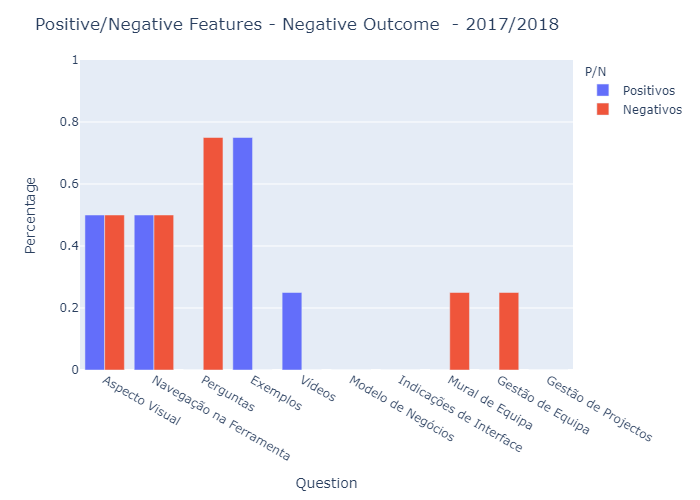

In [114]:
from IPython.display import Image
Image(filename='ImageOutputs/figurePosNegDisLiked20172018.png')



<a class="anchor" id="oddballs20172018"></a>

## Oddballs
* [Back to TOC](#backtoc)




### Liked but No Learning

In [115]:
Ano20172018likednolearn = Ano20172018.copy()
#subset for positive outcome and negative learning
Ano20172018likednolearn = Ano20172018likednolearn[Ano20172018likednolearn['Está satisfeito com a ferramenta DreamShaper?'] == 4] 
Ano20172018likednolearn = Ano20172018likednolearn[Ano20172018likednolearn['Quanto aprendeu com a DreamShaper?'] == 1] 
Ano20172018likednolearn.shape

(0, 22)

### Disliked but Learned


In [116]:
Ano20172018dislikedlearn = Ano20172018.copy()
#subset for positive outcome and negative learning
Ano20172018dislikedlearn = Ano20172018dislikedlearn[Ano20172018dislikedlearn['Está satisfeito com a ferramenta DreamShaper?'] == 1] 
Ano20172018dislikedlearn = Ano20172018dislikedlearn[Ano20172018dislikedlearn['Quanto aprendeu com a DreamShaper?'] == 5] 
Ano20172018dislikedlearn.shape

(0, 22)

<a class="anchor" id="allyears"></a>

# All years
* [Back to TOC](#backtoc)


In [117]:

featuresperyear = pd.concat([Ano20132014posnegSum, Ano20142015posnegSum, Ano20152016posnegSum, Ano20162017posnegSum, Ano20172018posnegSum], ignore_index=True)

In [118]:
featuresperyear

Question  Counts  Year  population  Percentage        P/N
0            Aspecto Visual     906  2014        1550    0.584516  Positivos
1   Navegação na Ferramenta     890  2014        1550    0.574194  Positivos
2                 Perguntas     516  2014        1550    0.332903  Positivos
3                  Exemplos     668  2014        1550    0.430968  Positivos
4                    Vídeos     252  2014        1550    0.162581  Positivos
..                      ...     ...   ...         ...         ...        ...
95       Modelo de Negócios      78  2018         870    0.089655  Negativos
96  Indicações de Interface     285  2018         870    0.327586  Negativos
97          Mural de Equipa     224  2018         870    0.257471  Negativos
98         Gestão de Equipa     134  2018         870    0.154023  Negativos
99      Gestão de Projectos      95  2018         870    0.109195  Negativos

[100 rows x 6 columns]

In [119]:
featuresperyear.to_csv(r'Data/DataforApp/featuresperyear.csv', index = False)
